# Implement ANN with keras

In [1]:
import tensorflow as tf
import seaborn as sb
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

# import mnist datasets

In [22]:
mnist=tf.keras.datasets.mnist

In [27]:
(x_train_full,y_train_full),(x_test,y_test)=mnist.load_data()

In [36]:
print(f"x_train_full.shape:{x_train_full.shape},y_train_full.shape:{y_train_full.shape},x_test.shape:{x_test.shape},y_test.shape:{y_test.shape}")

x_train_full.shape:(60000, 28, 28),y_train_full.shape:(60000,),x_test.shape:(10000, 28, 28),y_test.shape:(10000,)


# we have to split  x_train ,y_train ,x_valid ,y_valid and scale all include x_test within 0 to 1 by divide the pixels with 255

In [54]:
x_train_val,x_train=x_train_full[:5000]/255,x_train_full[5000:]/255
y_train_val,y_train=y_train_full[:5000],y_train_full[5000:]

x_test=x_test/255

In [55]:
x_train_val.shape

(5000, 28, 28)

In [43]:
x_train.shape

(55000, 28, 28)

In [44]:
x_test.shape

(10000, 28, 28)

7

The value of that below image is : 0


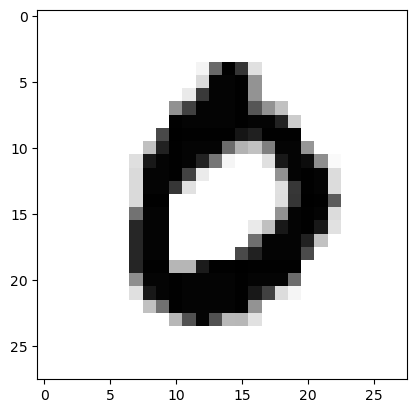

In [111]:
plt.imshow(x_test[3],cmap="binary")
print(f"The value of that below image is : {y_test[3]}")
    


In [73]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

# create a architechture

In [76]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [79]:
# input layer - flattes with 28 * 28 because input size is 28 * 28
# next hidden layer -dense -300 -hyperparamter ,activation =relu
# next hidden layer -dense -100 -hyperparameter,activation=relu
# here we have 0 to 9 outputs ,so we have to create 10 output layers ,activation=softmax
# we can give name for each layer

In [87]:
Layers=[tf.keras.layers.Flatten(input_shape=(28,28),name="Input_layer"),
        tf.keras.layers.Dense(300,activation="relu",name="Hiddenlayer1"),
        tf.keras.layers.Dense(100,activation="relu",name="Hiddenlayer2"),
        tf.keras.layers.Dense(10,activation="softmax",name="outputlayer")
]
model_arch=tf.keras.models.Sequential(Layers)

In [90]:
model_arch.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Flatten)       (None, 784)               0         
                                                                 
 Hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 Hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [93]:
hiddenlayer_1=model_arch.layers[1]

In [95]:
hiddenlayer_1.get_weights()

[array([[ 6.9443882e-03,  4.7220208e-02,  9.3306080e-03, ...,
          5.2643985e-02,  1.9211903e-02,  1.9809939e-02],
        [ 6.7606479e-02,  2.6499629e-03,  3.4382030e-02, ...,
         -6.9934309e-02,  6.5427408e-02, -4.9661521e-02],
        [-5.2187622e-02, -1.5449528e-02, -7.1953923e-02, ...,
         -3.4617141e-02,  1.2584083e-02, -4.5925573e-02],
        ...,
        [-5.1710755e-02, -7.1247585e-02, -5.4960314e-02, ...,
         -6.4226143e-02, -5.6352206e-02,  2.8355822e-02],
        [ 4.2021312e-02,  6.7343339e-03, -5.6062795e-02, ...,
         -1.7515562e-02, -4.1631505e-02,  7.0940703e-02],
        [ 2.1069609e-02, -8.2312152e-03, -3.4891546e-02, ...,
          5.1975250e-05,  6.1538011e-02, -6.8480179e-02]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.

# Model Compile 

In [96]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_arch.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

# Model training

In [98]:
EPOCHS = 30
VALIDATION_SET = (x_train_val, y_train_val)

history = model_arch.fit(x_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)

Epoch 1/30


1719/1719 [==============================] - 5s 2ms/step - loss: 0.6034 - accuracy: 0.8458 - val_loss: 0.3071 - val_accuracy: 0.9186
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2866 - accuracy: 0.9194 - val_loss: 0.2387 - val_accuracy: 0.9346
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2323 - accuracy: 0.9343 - val_loss: 0.1972 - val_accuracy: 0.9444
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1968 - accuracy: 0.9444 - val_loss: 0.1712 - val_accuracy: 0.9516
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1714 - accuracy: 0.9512 - val_loss: 0.1536 - val_accuracy: 0.9574
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1522 - accuracy: 0.9569 - val_loss: 0.1403 - val_accuracy: 0.9626
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1369 - accuracy: 0.9608 - val_loss: 0.1291 - val_accurac

# Evaluation

In [104]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.603402,0.845782,0.307077,0.9186
1,0.286625,0.919418,0.238694,0.9346
2,0.232268,0.934273,0.197161,0.9444
3,0.196823,0.944400,0.171203,0.9516
4,0.171391,0.951164,0.153640,0.9574
5,0.152195,0.956927,0.140255,0.9626
6,0.136854,0.960836,0.129056,0.9640
7,0.124191,0.965073,0.121328,0.9670
8,0.113134,0.968200,0.114026,0.9698
9,0.103912,0.970636,0.108497,0.9692


<Axes: >

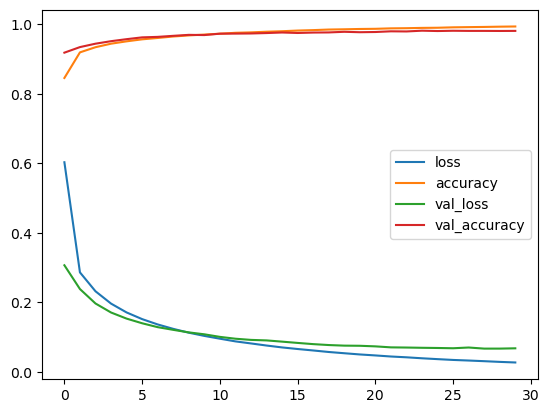

In [106]:
pd.DataFrame(history.history).plot()

In [107]:
model_arch.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 2.4345 - accuracy: 0.0922


[2.4344677925109863, 0.09220000356435776]

# Prediction

In [114]:
x_new=x_test[:3]

In [115]:
actual=y_test[:3]

In [116]:
actual

array([7, 2, 1], dtype=uint8)

In [118]:
y_prob=model_arch.predict(x_new)

1/1 [==============================] - 0s 23ms/step


In [130]:
y_prob.round(3)

array([[0.048, 0.075, 0.083, 0.024, 0.161, 0.177, 0.092, 0.074, 0.163,
        0.102],
       [0.048, 0.077, 0.087, 0.024, 0.157, 0.179, 0.097, 0.065, 0.17 ,
        0.097],
       [0.047, 0.078, 0.083, 0.024, 0.16 , 0.178, 0.094, 0.068, 0.165,
        0.102]], dtype=float32)

In [131]:
y_pred=np.argmax(y_prob,axis=-1)
y_pred

array([5, 5, 5], dtype=int64)

In [133]:
# 1.split dataset
# 2.Create arch
# 3.compile the model -add optimizer,loss function,metrics
# 4.fit or train the model - epoch,batch size,val dataset
# 5.evaluate the model
# 6.predict the model